# BTPN Data Engineer RAKAMIN FINAL PROJECT

## Import dan Instalasi Pustaka

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install seaborn

In [ ]:
#!pip install scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from scipy import stats

## Data Loading

In [ ]:
# Melakukan load data
df = pd.read_csv("customer_data_history.csv")
category_db = pd.read_csv("category_db.csv")
education_db = pd.read_csv("education_db.csv")
marital_db = pd.read_csv("marital_db.csv")
status_db = pd.read_csv("status_db.csv")

## Data Transformation

Pada sesi ini saya melakukan sedikit transformasi data. Di mana dari dataset-dataset yang diberikan, saya melakukan penggabungan tabel-tabel dengan menyesuaikan id antar tabelnya.

In [ ]:
# Menggabungkan setiap tabel referensi secara bertahap dan menghapus kolom id yang tidak diperlukan setelah setiap penggabungan
merged_df = pd.merge(df, category_db, left_on='card_categoryid', right_on='id').drop(columns='id')
merged_df = pd.merge(merged_df, education_db, left_on='Educationid', right_on='id').drop(columns='id')
merged_df = pd.merge(merged_df, marital_db, left_on='Maritalid', right_on='id').drop(columns='id')
merged_df = pd.merge(merged_df, status_db, left_on='idstatus', right_on='id').drop(columns='id')


# Menampilkan beberapa baris pertama dari dataframe yang telah digabungkan
merged_df.head()


,CLIENTNUM,idstatus,Customer_Age,Gender,Dependent_count,Educationid,Maritalid,Income_Category,card_categoryid,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Card_Category,Education_Level,Marital_Status,status
0,768805383,1,45,M,3,1,1,$60K - $80K,1,39,...,12691.0,777,11914.0,1144,42,0.061,Blue,High School,Married,Existing Customer
1,806160108,1,61,M,1,1,1,$40K - $60K,1,56,...,3193.0,2517,676.0,1336,30,0.788,Blue,High School,Married,Existing Customer
2,784725333,1,41,M,3,1,1,$40K - $60K,1,33,...,4470.0,680,3790.0,931,18,0.152,Blue,High School,Married,Existing Customer
3,806624208,1,47,M,4,1,1,$40K - $60K,1,42,...,4785.0,1362,3423.0,1045,38,0.285,Blue,High School,Married,Existing Customer
4,778493808,1,49,M,3,1,1,$60K - $80K,1,37,...,3906.0,0,3906.0,1756,32,0.000,Blue,High School,Married,Existing Customer


In [ ]:
# Menghapus kolom-kolom yang tidak diperlukan
merged_df.drop(columns=['idstatus', 'Educationid', 'Maritalid', 'card_categoryid'], inplace=True)

In [ ]:
# Melihat list kolom dataframe
merged_df.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Income_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Card_Category',
       'Education_Level', 'Marital_Status', 'status'],
      dtype='object')

In [ ]:
# Menyusun urutan kolom dataframe
merged_df = merged_df[['Card_Category','Education_Level', 'Marital_Status', 'status', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Income_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio']]

In [ ]:
merged_df

,Card_Category,Education_Level,Marital_Status,status,CLIENTNUM,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Blue,High School,Married,Existing Customer,768805383,45,M,3,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,Blue,High School,Married,Existing Customer,806160108,61,M,1,$40K - $60K,56,2,2,3,3193.0,2517,676.0,1336,30,0.788
2,Blue,High School,Married,Existing Customer,784725333,41,M,3,$40K - $60K,33,4,2,1,4470.0,680,3790.0,931,18,0.152
3,Blue,High School,Married,Existing Customer,806624208,47,M,4,$40K - $60K,42,6,0,0,4785.0,1362,3423.0,1045,38,0.285
4,Blue,High School,Married,Existing Customer,778493808,49,M,3,$60K - $80K,37,5,2,1,3906.0,0,3906.0,1756,32,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Blue,Doctorate,Divorced,Attrited Customer,720085233,51,F,2,Unknown,40,6,3,4,8930.0,2517,6413.0,2167,38,0.282
10123,Blue,Doctorate,Divorced,Attrited Customer,710015733,41,F,1,Less than $40K,30,3,3,1,2029.0,621,1408.0,3142,37,0.306
10124,Blue,Doctorate,Divorced,Attrited Customer,712046808,49,F,3,Unknown,42,1,3,3,3802.0,1558,2244.0,2003,43,0.410
10125,Blue,Doctorate,Divorced,Attrited Customer,708793008,46,M,3,$80K - $120K,35,5,3,3,9949.0,0,9949.0,2207,40,0.000


In [ ]:
# Melihat jumlah nasabah setiap kategori status
merged_df.status.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: status, dtype: int64

In [ ]:
# Melihat informasi umum tentang dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Card_Category             10127 non-null  object 
 1   Education_Level           10127 non-null  object 
 2   Marital_Status            10127 non-null  object 
 3   status                    10127 non-null  object 
 4   CLIENTNUM                 10127 non-null  int64  
 5   Customer_Age              10127 non-null  int64  
 6   Gender                    10127 non-null  object 
 7   Dependent_count           10127 non-null  int64  
 8   Income_Category           10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Eksplorasi Analisis Data

Pada sesi ini saya melakukan eksplorasi data dengan memisahkan analisa terhadap kolom-kolom yang merupakan kategorikal dan numerikal pada dataset.
Dalam dataset pada kasus ini, saya mengklasifikasikan kolom-kolom kategori menjadi 8, yaitu:

1. Gender,
2. Card Category,
3. Education Level,
4. Marital Status,
5. Status,
6. Income Category,
7. Dependent Count, dan
8. Total Relationship Count.

Dalam hal ini, saya memasukkan Dependent Count dan Total relationship count sebagai kolom kategorikal karena walaupun value dari kolom-kolom tersebut merupakan angka, namun dapat bermakna sebagai kategori.
Selanjutnya untuk kolom-kolom numerikal, yaitu:

1. Customer Age,
2. Months on Book,
3. Credit Limit,
4. Total Trans Amt,
5. Total Trans Ct, dan
6. Avg Utilization Ratio.


### Categorical

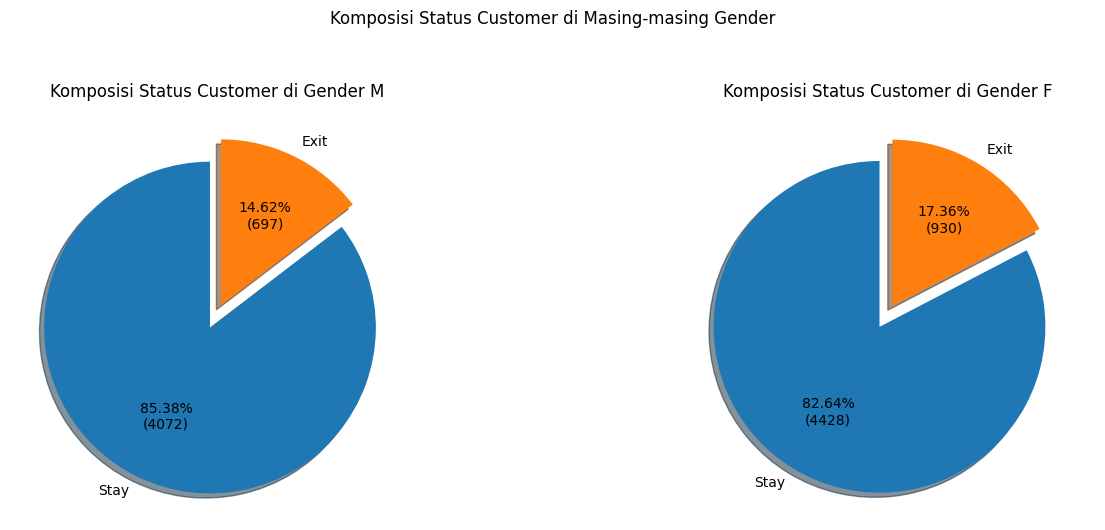

In [ ]:
# Mengambil list unik value kolom Gender
gender_pie = merged_df['Gender'].unique()

# Mengambil data male dan female untuk setiap elemen kolom status
stay_pie = merged_df[merged_df['status'] == 'Existing Customer']['Gender'].value_counts()
exit_pie = merged_df[merged_df['status'] == 'Attrited Customer']['Gender'].value_counts()

# Mengatur posisi dan letak plot gambar
fig, axs = plt.subplots(1, len(gender_pie), figsize=(15, 5), sharey=True)

# Melakukan loop untuk memplot setiap status dengan keterangan plot dan menambahkan efek explode pada pie chart
for i, j in enumerate(gender_pie):
    labels = ['Stay', 'Exit']
    sizes_pie = [stay_pie[j], exit_pie[j]]
    explode = (0.1, 0.05)

    # Menggunakan fungsi lambda untuk menampilkan jumlah pasti dan persentase
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%\n({v:d})'.format(p=pct, v=val)
        return my_autopct

    axs[i].pie(sizes_pie, explode=explode, labels=labels, autopct=make_autopct(sizes_pie), shadow=True, startangle=90)
    axs[i].set_title(f'Komposisi Status Customer di Gender {j}', y=1)

# Menambahkan judul dari keseluruhan plot dan mengatur layout
plt.suptitle('Komposisi Status Customer di Masing-masing Gender', y=1.05)
plt.tight_layout()
plt.show()


Berdasarkan grafik pie di atas dapat dilihat bahwa di kategori gender Laki-laki (M) terdapat 4072 (85.38%) nasabah yang Stay, dan 697 (14.62%) nasabah yang Exit.

Sementara di kategori perempuan (F) terdapat 4428 (82.64%) nasabah yang Stay terdapat 930 (17.36%) nasabah.

Dengan hal ini, dapat dilihat bahwa setiap kategori Gender tidak menunjukkan perbedaan yang cukup signifikan di antara kelompok nasabah Existing atau Attrited nasabah.

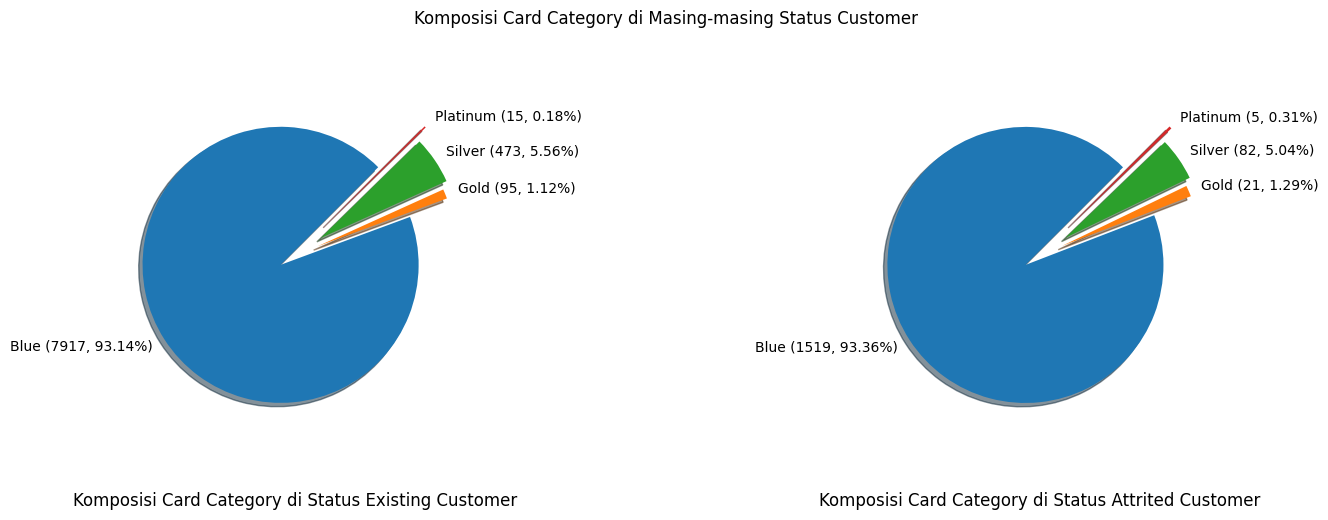

In [ ]:
# Mengambil list value unik kolom status
status_pie = merged_df['status'].unique()

# Mengambil data male dan female untuk setiap elemen kolom status
blue_pie = merged_df[merged_df['Card_Category'] == 'Blue']['status'].value_counts()
gold_pie = merged_df[merged_df['Card_Category'] == 'Gold']['status'].value_counts()
silver_pie = merged_df[merged_df['Card_Category'] == 'Silver']['status'].value_counts()
platinum_pie = merged_df[merged_df['Card_Category'] == 'Platinum']['status'].value_counts()

# Mengatur posisi dan letak plot gambar
fig, axs = plt.subplots(1, len(gender_pie), figsize=(15, 5), sharey=True)

for i, j in enumerate(status_pie):
    sizes_pie = [blue_pie[j], gold_pie[j], silver_pie[j], platinum_pie[j]]
    total = sum(sizes_pie)

    # Menghitung persentase dan memformat label
    labels = [f'Blue ({sizes_pie[0]}, {sizes_pie[0]/total:.2%})',
              f'Gold ({sizes_pie[1]}, {sizes_pie[1]/total:.2%})',
              f'Silver ({sizes_pie[2]}, {sizes_pie[2]/total:.2%})',
              f'Platinum ({sizes_pie[3]}, {sizes_pie[3]/total:.2%})']
    explode = (0.125, 0.175, 0.225, 0.325)

    axs[i].pie(sizes_pie, explode=explode, labels=labels, shadow=True, startangle=45)
    axs[i].set_title(f'Komposisi Card Category di Status {j}', y=-0.25)

plt.suptitle('Komposisi Card Category di Masing-masing Status Customer', y=1.05)
plt.tight_layout()
plt.show()


Pada grafik pie di atas dapat dilihat bahwa di kelompok nasabah yang **Existing** memiliki nasabah dengan Card Category sebagai berikut:

1. Blue 7917 (93.14%) nasabah,
2. Platinum 15 (0.18%) nasabah,
3. Silver 473 (5.56%) nasabah, dan
4. Gold 95 (1.12%) nasabah.

Sementara untuk kelompok nasabah yang **Attrited** memiliki nasabah dengan Card Category sebagai berikut:

1. Blue 1519 (93.36%) nasabah,
2. Platinum 5 (0.31%) nasabah,
3. Silver 82 (5.04%) nasabah, dan
4. Gold 21 (1.29%) nasabah.

Berdasarkan hal ini, maka dapat dilihat bahwa di setiap kelompok nasabah Existing dan Attrited tidak menunjukkan karakteristik yang berbeda dalam hal Card Category.



In [ ]:
merged_df.columns

Index(['Card_Category', 'Education_Level', 'Marital_Status', 'status',
       'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Income_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
# Membuat fungsi untuk membantu visualisasi
def hbar_cat(i):
    kolom = merged_df.groupby([i, 'status']).size().unstack(fill_value=0)

    # Menyiapkan data untuk plotting
    categories = kolom.index
    existing = kolom['Existing Customer']
    attrited = kolom['Attrited Customer']
    bar_width = 0.25
    index = np.arange(len(categories))

    # Membuat bar chart horizontal
    plt.figure(figsize=(9, 6))
    bars1 = plt.barh(index, existing, bar_width, label='Existing Customer')
    bars2 = plt.barh(index + bar_width, attrited, bar_width, label='Attrited Customer')

    # Menambahkan label angka pada setiap bar
    for bar in bars1:
        num = bar.get_width()
        percent = num/sum(existing) * 100
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/3, f'({num:.0f},  {percent:.0f}%)',
                va='center', ha='left', color = 'blue')

    for bar in bars2:
        num = bar.get_width()
        percent = num/sum(attrited) * 100
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/3, f'({num:.0f},  {percent:.0f}%)',
                va='center', ha='left', color = 'red')

    # Menambahkan label dan judul
    plt.xlabel('Jumlah Nasabah')
    plt.ylabel(f'{i}')
    plt.title(f'Jumlah Kategori {i} Berdasarkan Status Customer')
    plt.yticks(index + bar_width / 2, categories)
    plt.legend()

    # Menampilkan plot
    plt.tight_layout()
    plt.show()


In [ ]:
# Membuat list untuk kolom-kolom kategorikal yang akan divisualisasi
cat_list = ['Education_Level', 'Marital_Status', 'Income_Category', 'Dependent_count', 'Total_Relationship_Count']

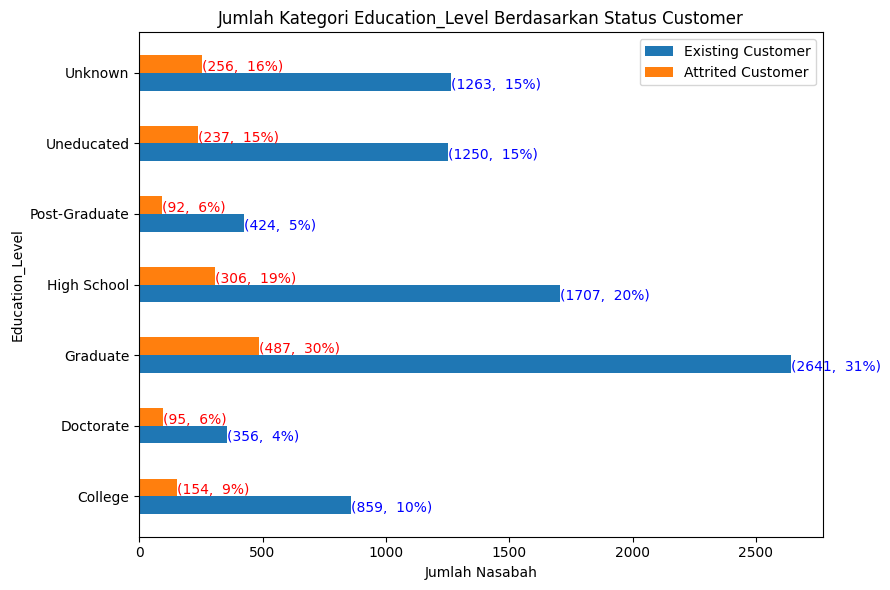

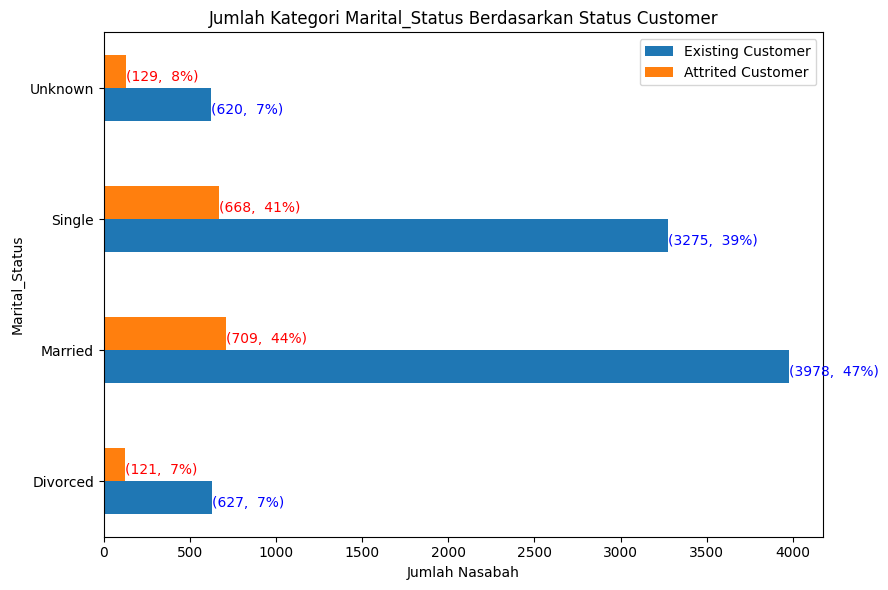

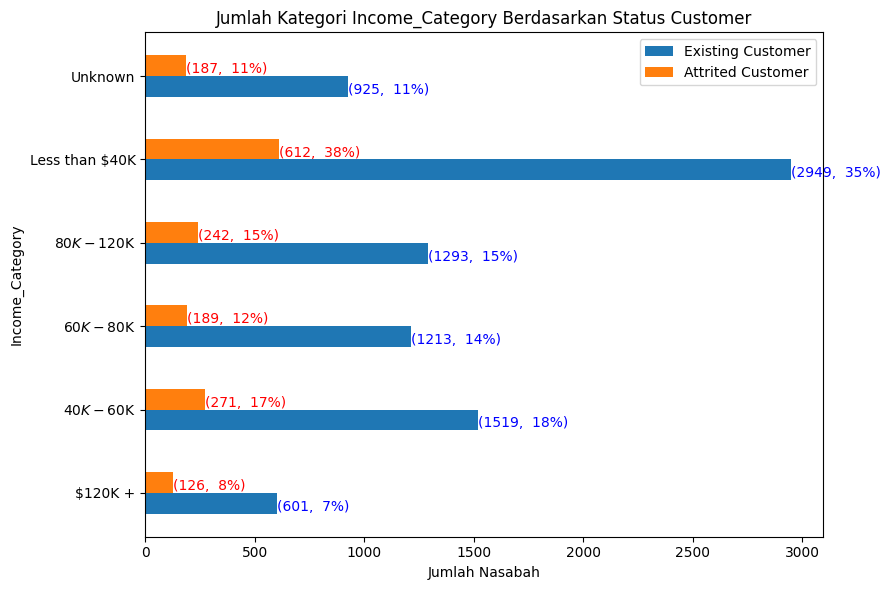

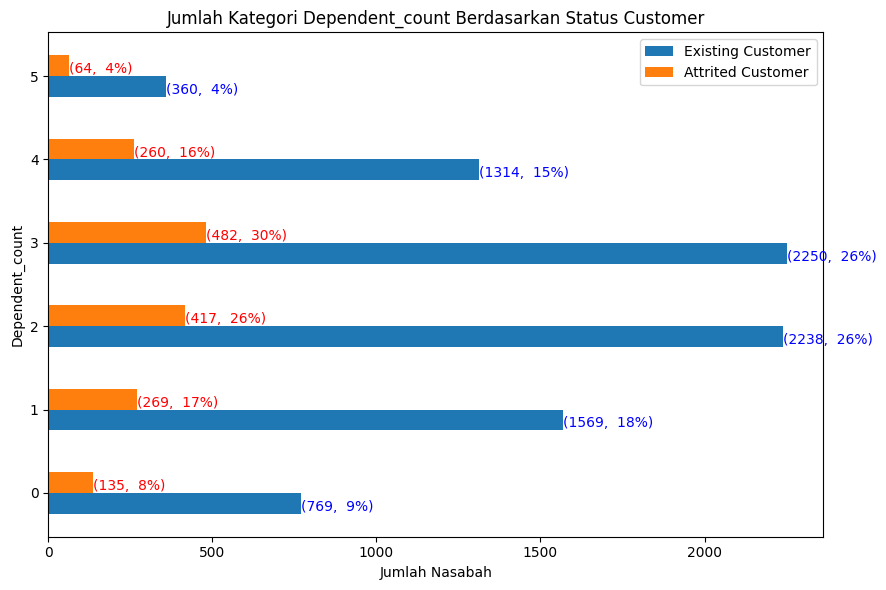

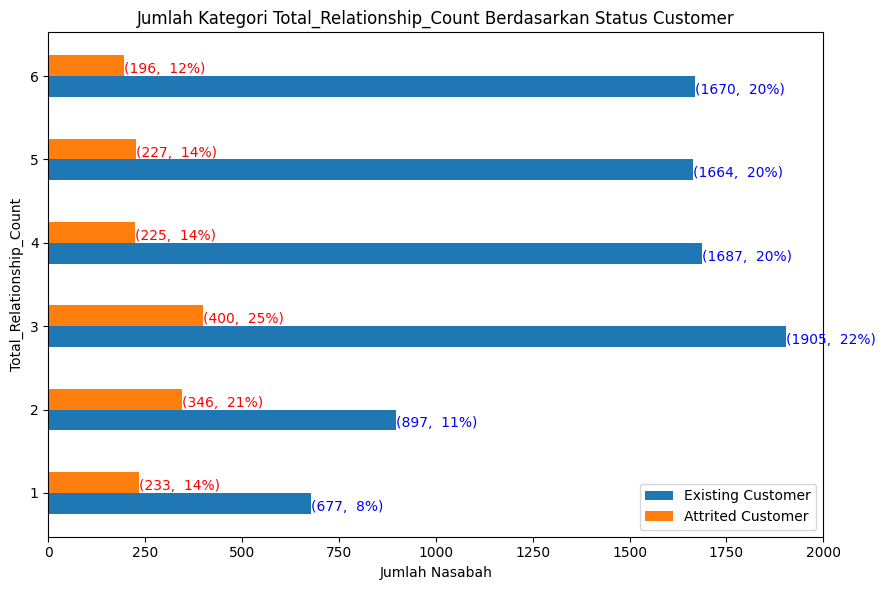

In [ ]:
# Membuat loop untuk visualisasi
for i in cat_list:
    hbar_cat(i)


Berdasarkan grafik bar horisontal di atas, dapat terlihat karakteristik setiap kelompok Existing dan Attrited di beberapa kolom kategorikal, yaitu:

* Educational Level
  1. Unknown: Attrited 16%, Existing 15%
  2. Uneducated: Attrited 15%, Existing 15%
  3. Post-Graduated: Attrited 6%, Existing 5%
  4. High School: Attrited 19%, Existing 20%
  5. Graduate: Attrited 30%, Existing 31%
  6. Doctorate: Attrited 6%, Existing 4%
  7. College: Attrited 9%, Existing 10%

* Marital Status
  1. Unknown: Attrited 8%, Existing 7%
  2. Single: Attrited 41%, Existing 39%
  3. Married: Attrited 44%, Existing 47%
  4. Divorced: Attrited 7%, Existing 7%

* Income Category
  1. Unknown: Attrited 11%, Existing 11%
  2. Less than 40k: Attrited 38%, Existing 35%
  3. 80k-120k: Attrited 15%, Existing 15%
  4. 60k-80k: Attrited 12%, Existing 14%
  5. 120k+: Attrited 8%, Existing 7%

* Dependent Count
  1. 5 units: Attrited 4%, Existing 4%
  2. 4 units: Attrited 16%, Existing 15%
  3. 3 units: Attrited 30%, Existing 26%
  4. 2 units: Attrited 26%, Existing 26%
  5. 1 unit: Attrited 17%, Existing 18%
  6. 0 unit: Attrited 8%, Existing 9%

* Total Relationship Count
  1. 6 units: Attrited 12%, Existing 20%
  2. 5 units: Attrited 14%, Existing 20%
  3. 4 units: Attrited 14%, Existing 20%
  4. 3 units: Attrited 25%, Existing 22%
  5. 2 units: Attrited 21%, Existing 11%
  6. 1 unit: Attrited 14%, Existing 8%

Pada hasil pengamatan di atas dapat terlihat bahwa di kategori Educational Level, Marital Status, Income Category, dan Dependent Count tidak menunjukkan karakteristik yang berbeda di antara kelompok Existing dan Attrited.

Sementara pada kategori Total Relationship Count terlihat perbedaan, yaitu bahwa kelompok Attrited cenderung lebih banyak di Total Relationship Count sebanyak 1 - 3 units, sementara kelompok Existing lebih banyak di 3-6 units.

Dengan hal ini, menunjukkan bahwa semakin banyak Total Relationship count, maka semakin besar kecenderungan nasabah untuk Stay.

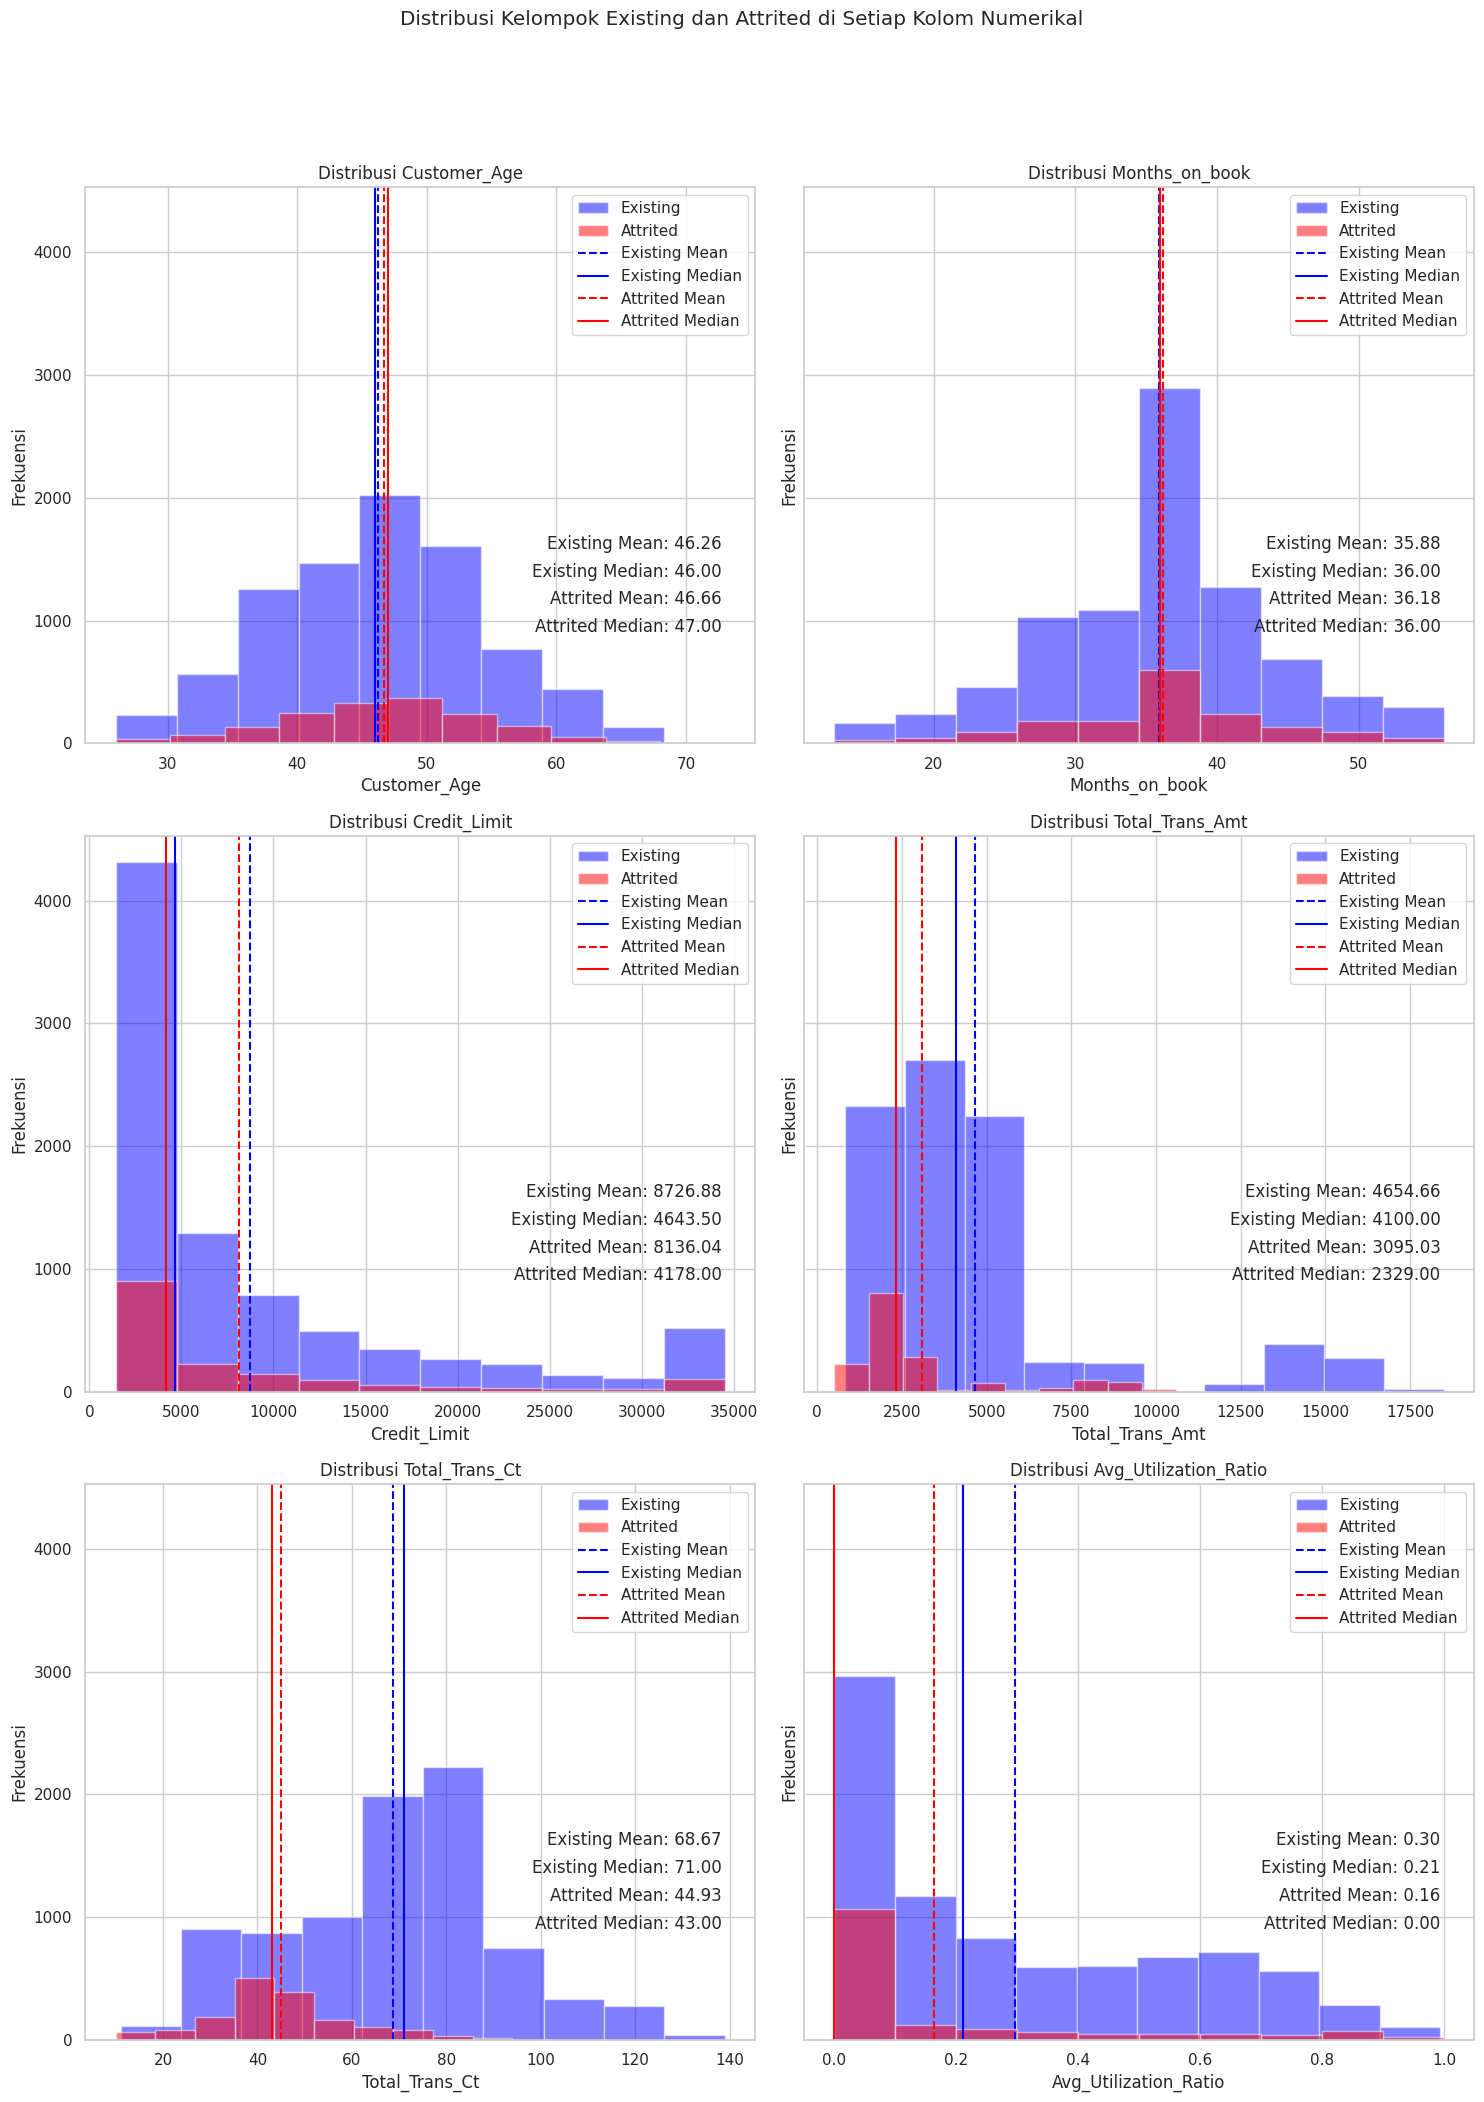

In [ ]:
# Mengatur ukuran, letak, dan posisi gambar plot
fig, axs = plt.subplots(3, 2, figsize=(15, 20), sharey=True)

# Mendefinisikan kolom dan judul untuk histogram
columns = ['Customer_Age', 'Months_on_book', 'Credit_Limit',
           'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

# Loop untuk membuat setiap histogram
for i, col in enumerate(columns):
    row = i // 2
    col = i % 2
    stay_cust = merged_df[(merged_df['status'] == 'Existing Customer')]
    exit_cust = merged_df[(merged_df['status'] == 'Attrited Customer')]
    axs[row, col].hist(stay_cust[columns[i]], bins=10, alpha=0.5, color='blue', label='Existing')
    axs[row, col].hist(exit_cust[columns[i]], bins=10, alpha=0.5, color='red', label='Attrited')
    axs[row, col].set_xlabel(f'{columns[i]}')
    axs[row, col].set_ylabel('Frekuensi')
    axs[row, col].set_title(f'Distribusi {columns[i]}')
    axs[row, col].legend()

    #menghitung dan menambahkan garis mean dan median
    axs[row, col].axvline(stay_cust[columns[i]].mean(), color='blue', linestyle='--', linewidth=1.5, label='Existing Mean')
    axs[row, col].axvline(stay_cust[columns[i]].median(), color='blue', linestyle='-', linewidth=1.5, label='Existing Median')
    axs[row, col].axvline(exit_cust[columns[i]].mean(), color='red', linestyle='--', linewidth=1.5, label='Attrited Mean')
    axs[row, col].axvline(exit_cust[columns[i]].median(), color='red', linestyle='-', linewidth=1.5, label='Attrited Median')

    axs[row, col].text(0.95, 0.35, f'Existing Mean: {stay_cust[columns[i]].mean():.2f}', transform=axs[row, col].transAxes, ha='right')
    axs[row, col].text(0.95, 0.30, f'Existing Median: {stay_cust[columns[i]].median():.2f}', transform=axs[row, col].transAxes, ha='right')
    axs[row, col].text(0.95, 0.25, f'Attrited Mean: {exit_cust[columns[i]].mean():.2f}', transform=axs[row, col].transAxes, ha='right')
    axs[row, col].text(0.95, 0.20, f'Attrited Median: {exit_cust[columns[i]].median():.2f}', transform=axs[row, col].transAxes, ha='right')

    #menambah keterangan nilai mean dan median di pojok kiri atas
    axs[row, col].legend()

#menambahkan judul untuk setiap plot dan mengatur layout
plt.suptitle('Distribusi Kelompok Existing dan Attrited di Setiap Kolom Numerikal', y=1.05)
plt.tight_layout()
plt.show()


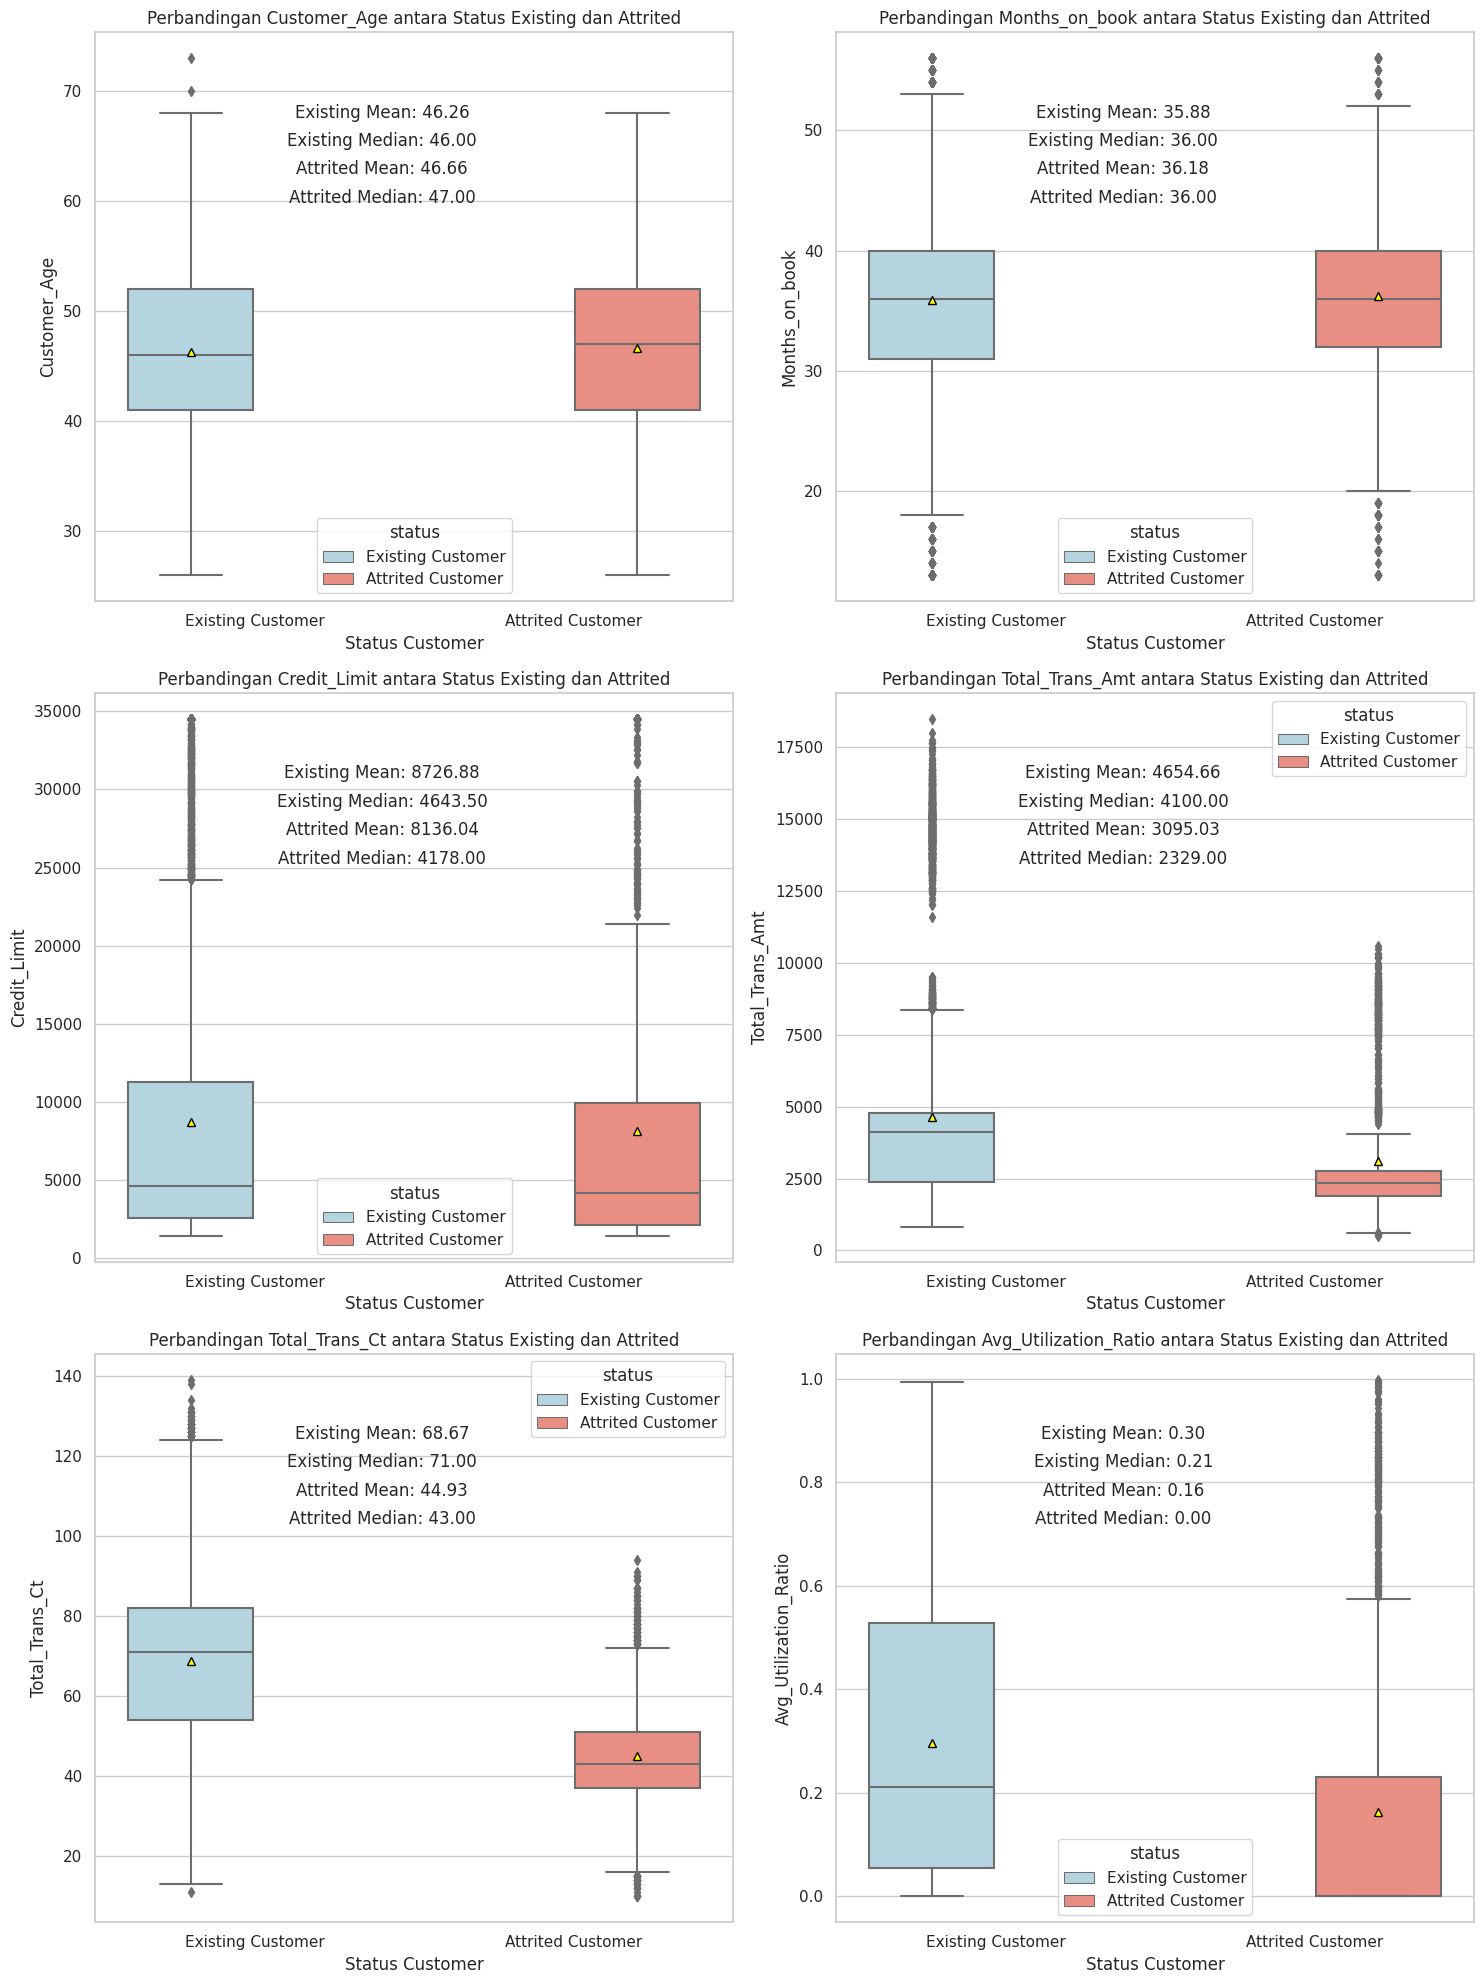

In [ ]:
# Mengatur warna untuk kedua kategori status
palette = {"Existing Customer": "lightblue", "Attrited Customer": "salmon"}

# Membuat legenda khusus untuk mean
mean_marker = mlines.Line2D([], [], color='yellow', marker='^', linestyle='None',
                            markersize=10, markeredgecolor='black', label='Mean (Rata-Rata)')

# Membuat box plot untuk setiap kolom numerik
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Loop untuk setiap kolom numerik
for i, col in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = sns.boxplot(x='status', y=columns[i], hue='status', data=merged_df, ax=axs[row, col],
                     palette=palette, showmeans=True,
                     meanprops={"marker":"^", "markerfacecolor":"yellow", "markeredgecolor":"black"})
    axs[row, col].text(0.45, 0.85, f'Existing Mean: {stay_cust[columns[i]].mean():.2f}', transform=axs[row, col].transAxes, ha='center')
    axs[row, col].text(0.45, 0.80, f'Existing Median: {stay_cust[columns[i]].median():.2f}', transform=axs[row, col].transAxes, ha='center')
    axs[row, col].text(0.45, 0.75, f'Attrited Mean: {exit_cust[columns[i]].mean():.2f}', transform=axs[row, col].transAxes, ha='center')
    axs[row, col].text(0.45, 0.70, f'Attrited Median: {exit_cust[columns[i]].median():.2f}', transform=axs[row, col].transAxes, ha='center')
    axs[row, col].set_title(f'Perbandingan {columns[i]} antara Status Existing dan Attrited')
    axs[row, col].set_xlabel('Status Customer')
    axs[row, col].set_ylabel(columns[i])


plt.tight_layout()
plt.show()


Pada grafik histogram dan boxplot di atas dapat diketahui beberapa informasi karakteristik di kelompok Existing dan Attrited, yaitu:

1. Customer Age
  * Mean: Existing 46.26 tahun, Attrited 46.66 tahun
  * Median: Existing 46 tahun, Attrited 47 tahun

2. Months on Book
  * Mean: Existing 35.88 bulan, Attrited 36.18 bulan
  * Median: Existing 36 bulan, Attrited 36 bulan

3. Credit Limit
  * Mean: Existing 8726.88 Dollar, Attrited 8136.04 Dollar
  * Median: Existing 4643.50 Dollar, Attrited 4178.00 Dollar

4. Total Transaction Ammount
  * Mean: Existing 4654.66 Dollar, Attrited 3095.03 Dollar
  * Median: Existing 4100.00 Dollar, Attrited 2329.00 Dollar

5. Total Transaction Count
  * Mean: Existing 68.67 kali, Attrited 44.93 kali
  * Median: Existing 71.00 kali, Attrited 43.00 kali

6. Average Utilization Ratio
  * Mean: Existing 0.30 satuan, Attrited 0.16 satuan
  * Median: Existing 0.21 satuan, Attrited 0.00 satuan

Berdasarkan hasil di atas, dapat ditarik kesimpulan bahwa pada kategori Total Transaction Ammount, Total Transaction Count, dan Average Utilization Ratio memiliki perbedaan yang cukup signifikan.

Di mana dapat dilihat bahwa di kelompok Existing memiliki jumlah yang lebih tinggi di masing-masing kategori tersebut jika dibandingkan dengan kelompok Attrited.

Dengan hal ini dapat disimpulkan bahwa semakin banyak jumlah transaksi, nominal transaksi, dan rata-rata pemanfaatan nasabah, maka nasabah tersebut memiliki kecedenderungan yang tinggi untuk Stay di Bank.


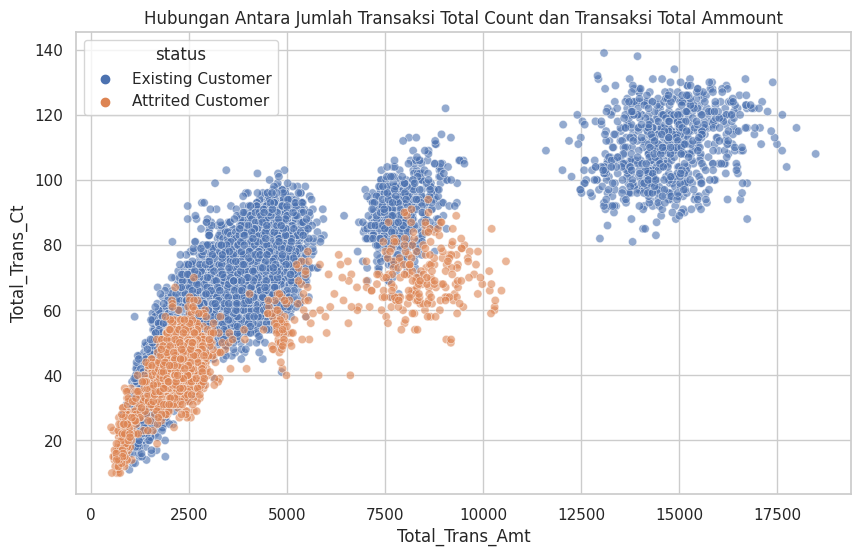

In [ ]:
# Setting the style for the plot
sns.set(style="whitegrid")

# Creating a scatter plot to analyze the relationship between Total_Trans_Amt and customer status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="Total_Trans_Amt", y="Total_Trans_Ct", hue= 'status', alpha=0.6)

plt.title("Hubungan Antara Jumlah Transaksi Total Count dan Transaksi Total Ammount")
plt.xlabel("Total_Trans_Amt")
plt.ylabel("Total_Trans_Ct")
plt.show()
